# SimpleRNN Test Code

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt



# Simple RNN - without Normalization

In [4]:
# input 데이터 생성(100,5,1): (5,1)짜리 100개

X = [[[i+j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [5]:
# Output 데이터 생성 (100, 1)

y = [(i+5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

In [6]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [7]:
# train & test split - 8:2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

## Modeling

In [8]:
# model define

from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = False))

model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [9]:
# model compile

model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [10]:
# model fit

Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 3554.1929 - accuracy: 0.0000e+00 - val_loss: 3502.4512 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 3549.7671 - accuracy: 0.0000e+00 - val_loss: 3498.1094 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 3545.5273 - accuracy: 0.0000e+00 - val_loss: 3493.8188 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 3541.3782 - accuracy: 0.0000e+00 - val_loss: 3489.5757 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 3537.0383 - accuracy: 0.0000e+00 - val_loss: 3485.5183 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 3533.1868 - accuracy: 0.0000e+00 - val_loss: 3481.2632 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - lo

In [11]:
# model predict

y_hat = model_1.predict(X_test)

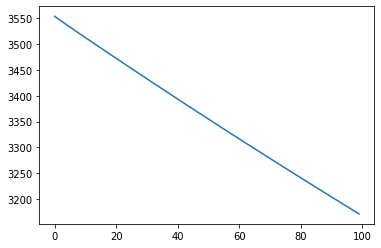

In [12]:
# visualization

plt.plot(Hist_1.history['loss'])
plt.show()

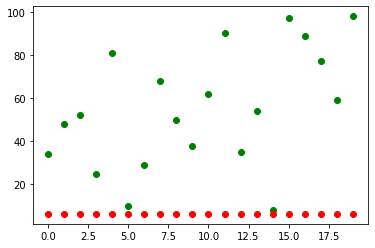

In [13]:
# 녹색 : 정답(y_test) / 적색 : 예측(y_hat)

plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()                                      # loss는 감소 but, 학습은 되지 않음

# SimpleRNN - with Normalization

In [14]:
# sample Data with Normalization

X = [[[(i+j)] for i in range(5)] for j in range(100)]
y = [(i+5) for i in range(100)]

X = (X -np.min(X)) / (np.max(X) - np.min(X))
y = (y -np.min(y)) / (np.max(y) - np.min(y))

In [15]:
# Casting

X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [16]:
# train&test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

Modeling

In [17]:
# model define

model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),       # None => x의 크기에 잘 맞춰줌
                             return_sequences = False))

model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model compile 

model_2.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [20]:
# model fit

Hist_2 = model_2.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.1733 - accuracy: 0.0250 - val_loss: 0.1592 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1204 - accuracy: 0.0250 - val_loss: 0.1097 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.0250 - val_loss: 0.0729 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.0250 - val_loss: 0.0479 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.0250 - val_loss: 0.0323 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 0.0250 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.0250 - val_loss: 0.0174 - val_accur

In [21]:
# model Predict

y_hat = model_2.predict(X_test)

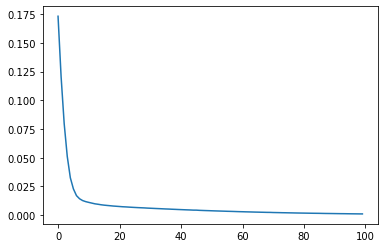

In [22]:
# Visualization

# Loss 감소

plt.plot(Hist_2.history['loss'])
plt.show()

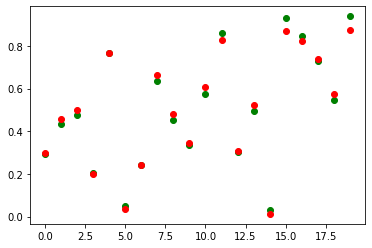

In [23]:
# 학습성공

plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# Stacked_SimpleRNN

In [24]:
# Model Define

model_3 = models.Sequential(name = 'Stacked_RNN')
model_3.add(layers.SimpleRNN(3, 
                             input_shape = (None, 1),
                             return_sequences = True))
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))

model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [25]:
# model compile

model_3.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])


In [26]:
# model fit

Hist_3 = model_3.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 0.3000 - accuracy: 0.0250 - val_loss: 0.2546 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1682 - accuracy: 0.0250 - val_loss: 0.1392 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0981 - accuracy: 0.0250 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0680 - accuracy: 0.0250 - val_loss: 0.0483 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.0250 - val_loss: 0.0324 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.0250 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0210 - accuracy: 0.0250 - val_loss: 0.0152 - val_accur

In [27]:
# Model predict

y_hat = model_3.predict(X_test)

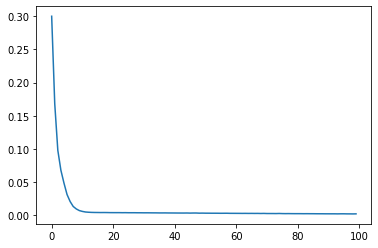

In [28]:
# Visualization

plt.plot(Hist_3.history['loss'])
plt.show()

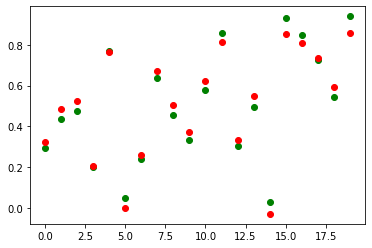

In [29]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# 'return_sequence' Output_options

- input_length에 대한 sequence 전체를 출력할지 설정(True, False)

In [31]:
# 실습 데이터 생성

X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [32]:
# test용 input data

X_test[0].reshape(1,5,1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

In [33]:
# False_option
# - 마지막 output만 출력 -> units = 1

Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5,1),
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])


In [34]:
Model_False.predict(X_test[0].reshape(1,5,1))

array([[-0.9991712]], dtype=float32)

In [35]:
# 마지막 output만 출력

Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5,1),
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [36]:
Model_False.predict(X_test[0].reshape(1,5,1))

array([[-0.999699, -1.      , -1.      ]], dtype=float32)

In [37]:
# True_option
# 매 순환마다ouput 출력
# unit = 1 / input_length = 5

Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5,1),
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

Model_True.predict(X_test[0].reshape(1,5,1))

array([[[1.        ],
        [0.99999964],
        [1.        ],
        [1.        ],
        [1.        ]]], dtype=float32)

In [39]:
# unit = 3 / input_length = 5

Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1), 
                                return_sequences = True))
Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

Model_True.predict(X_test[0].reshape(1,5,1))

array([[[ 0.99995685, -1.        , -0.9999996 ],
        [ 0.99993   , -1.        , -0.99999803],
        [ 0.9999518 , -1.        , -0.9999989 ],
        [ 0.9999668 , -1.        , -0.99999934],
        [ 0.999977  , -1.        , -0.9999996 ]]], dtype=float32)